In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, mannwhitneyu

from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [2]:
symbol = "BNBUSDT"
if Path("C:").exists():  # Windows
    input_path = r"C:\Users\phamhoa\Downloads\thesis\data\Binance\agg\500\VPIN"
    file_path = rf"{input_path}\{symbol}.csv"
else:  # Macbook
    input_path = "/Users/hoapham/Documents/Learning/thesis/data/Binance/agg/500/VPIN"
    file_path = f"{input_path}/{symbol}.csv"

df = pd.read_csv(file_path, parse_dates=['Time'])

df = df.drop(columns=["Unnamed: 0"], errors='ignore')

In [3]:
lst_input = ["VPIN", "Roll", "RollImpact", "KyleLambda", "AmihudLambda", "CDF"]
list_output = ["SpreadChangeSign", "RealizedVolatilitySign", "JB_ChangeSign", "AR_ChangeSign", "SkewnessSign", "KurtosisSign", "ReturnsSign", "MASign"]

# Khảo sát bộ data

In [4]:
df

,Time,Buy,Sell,Price,BidPrice,AskPrice,Volume,VPIN,CDF,Roll,...,Kurtosis,JB_rolling,JB_ChangeSign,AR,AR_ChangeSign,SkewnessSign,KurtosisSign,MA_20,MA_50,MASign
0,2025-08-24 18:45:24+00:00,1802.741156,1553.258844,881.728005,881.876589,881.555556,3356.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,2025-08-24 19:10:11+00:00,1858.405179,1497.594821,880.097050,880.052775,880.151991,3356.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,2025-08-24 19:31:06+00:00,1803.229665,1552.770335,880.134309,880.211043,880.045199,3356.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,2025-08-24 19:34:33+00:00,1230.949753,2125.050247,873.011996,873.320582,872.833246,3356.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,2025-08-24 19:36:19+00:00,1632.295588,1723.704412,869.437922,869.522694,869.357645,3356.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,2025-09-06 03:44:24+00:00,2044.705558,1311.294442,858.377442,858.444184,858.273370,3356.0,0.153843,0.801020,1.456280,...,0.951642,12.148379,-1.0,0.231737,1.0,-1.0,1.0,850.673101,849.477424,1
633,2025-09-06 04:04:29+00:00,1595.687000,1760.313000,859.023810,859.150403,858.909056,3356.0,0.152954,0.790816,1.463797,...,0.954471,12.257558,-1.0,0.233428,1.0,-1.0,1.0,851.224243,849.761355,1
634,2025-09-06 04:31:45+00:00,2023.063992,1332.936008,858.862635,858.915534,858.782347,3356.0,0.153817,0.799320,1.459251,...,0.922680,12.273364,-1.0,0.237822,1.0,-1.0,1.0,851.811798,850.033758,1
635,2025-09-06 04:49:39+00:00,1810.571153,1545.428847,857.136780,856.992857,857.305396,3356.0,0.149545,0.755102,1.490595,...,0.902320,12.443583,-1.0,0.222406,1.0,-1.0,1.0,852.378189,850.303466,1


In [5]:
# Chỉ giữ lại các cột cần dùng
df = df[lst_input + list_output]

In [6]:
df.shape

(637, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VPIN                    588 non-null    float64
 1   Roll                    586 non-null    float64
 2   RollImpact              586 non-null    float64
 3   KyleLambda              587 non-null    float64
 4   AmihudLambda            587 non-null    float64
 5   CDF                     588 non-null    float64
 6   SpreadChangeSign        587 non-null    float64
 7   RealizedVolatilitySign  537 non-null    float64
 8   JB_ChangeSign           537 non-null    float64
 9   AR_ChangeSign           537 non-null    float64
 10  SkewnessSign            537 non-null    float64
 11  KurtosisSign            537 non-null    float64
 12  ReturnsSign             586 non-null    float64
 13  MASign                  637 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 69.

- Bộ dữ liệu có những dòng dữ liệu null do quá trình tính toán bằng rolling

In [8]:
# Xóa những dòng có giá trị null
df = df.dropna()
df.shape

(537, 14)

# PHÂN TÍCH BIẾN ĐẦU VÀO

### Thống kê mô tả của các biến đầu vào cho mô hình

In [9]:
pd.DataFrame(df[lst_input].describe()).T

,count,mean,std,min,25%,50%,75%,max
VPIN,537.0,1.432800e-01,2.073707e-02,1.115386e-01,1.316521e-01,1.394160e-01,1.463385e-01,2.145679e-01
Roll,537.0,1.453098e+00,5.843361e-01,9.687522e-02,1.040464e+00,1.426927e+00,1.881740e+00,2.612223e+00
RollImpact,537.0,5.063459e-07,2.041089e-07,3.374150e-08,3.643358e-07,4.969634e-07,6.543768e-07,9.036463e-07
KyleLambda,537.0,-9.090465e+10,1.106583e+12,-2.175523e+13,-7.581792e-04,-3.754208e-04,-1.230964e-04,4.307313e+12
AmihudLambda,537.0,6.845753e+05,1.266396e+05,5.012621e+05,5.711451e+05,6.530736e+05,8.093545e+05,9.572337e+05
CDF,537.0,4.711613e-01,2.841793e-01,1.700680e-03,2.295918e-01,4.574830e-01,6.921769e-01,1.000000e+00


### Biểu đồ phân bố của VPIN

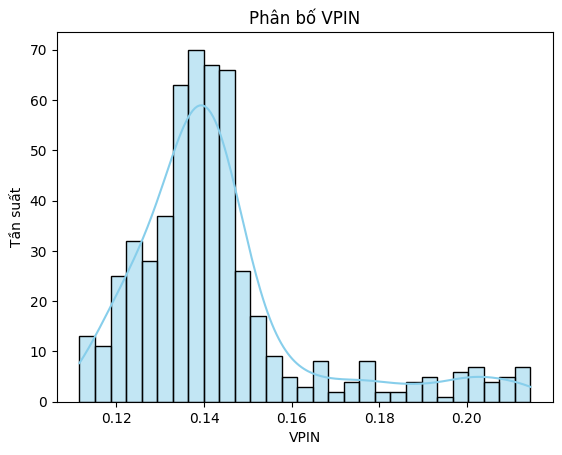

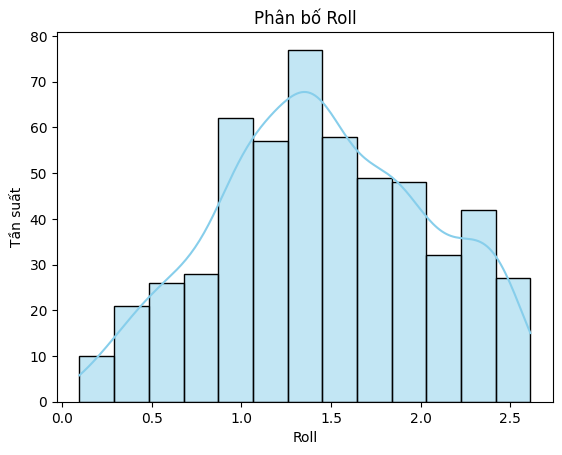

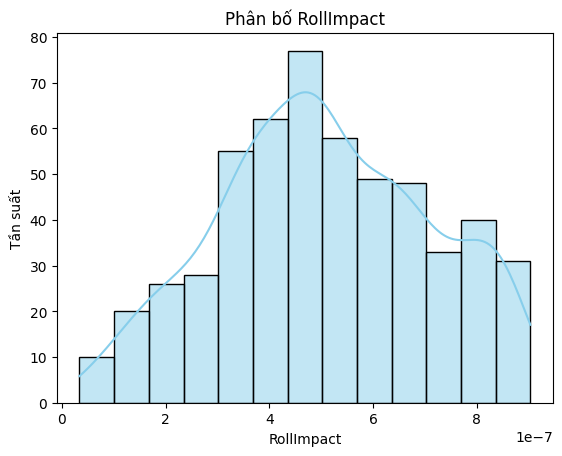

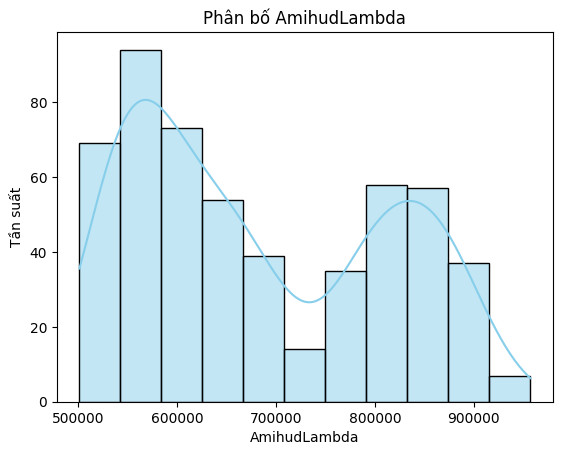

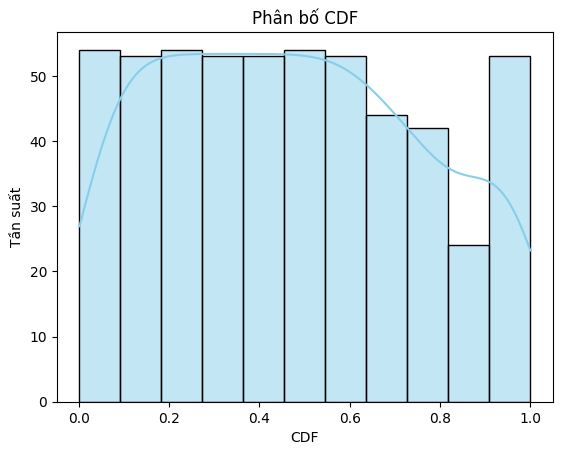

In [10]:
for col in lst_input:
    try:
        plt.Figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f'Phân bố {col}')
        plt.xlabel(col)
        plt.ylabel('Tần suất')
        plt.show()
    except:
        pass

### Vẽ biểu đồ hộp - Boxplot của VPIN

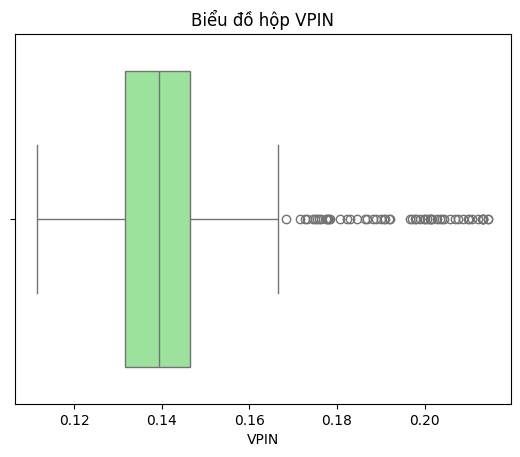

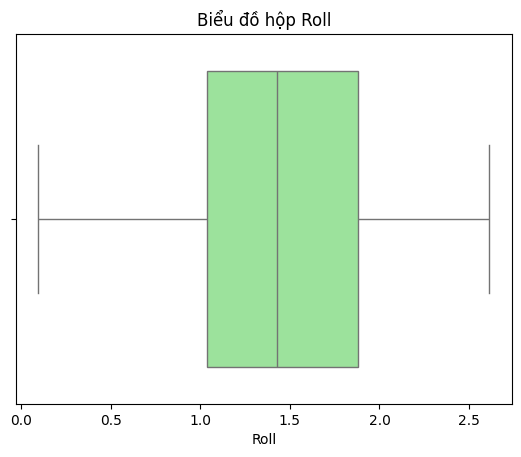

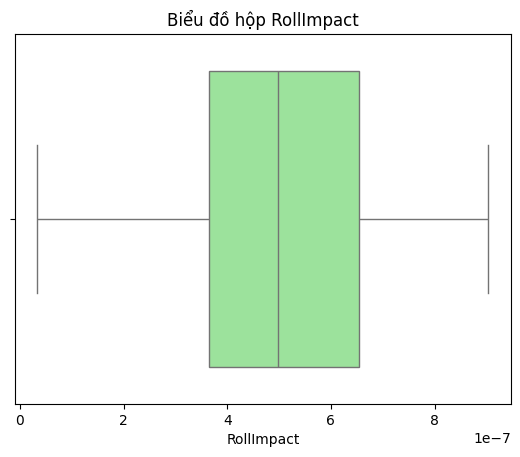

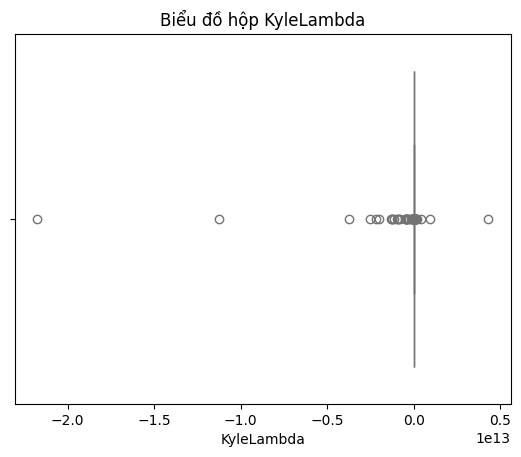

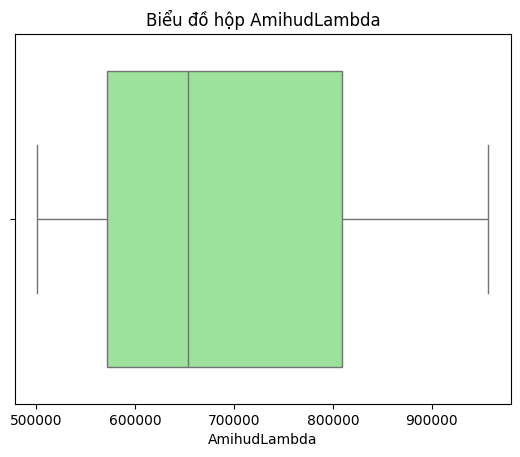

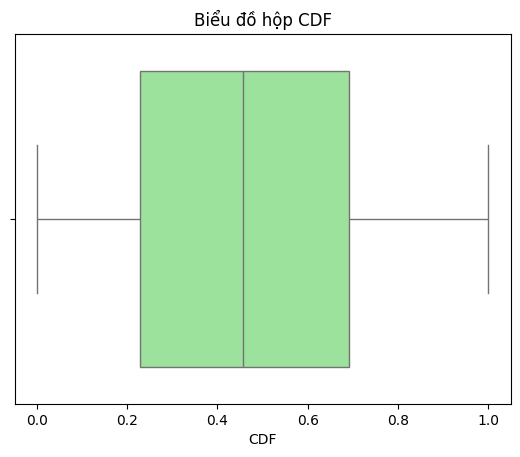

In [11]:
for col in lst_input:
    plt.Figure(figsize=(10, 6))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Biểu đồ hộp {col}')
    plt.xlabel(col)
    plt.show()

In [12]:
# def plot_vpin(buckets, col):
#     plt.figure(figsize=(12,6))
#     plt.plot(buckets["Time"].dt.floor('h'), buckets[col], label=f'{col}', linewidth=1.5)
#     plt.title(f"Xu hướng {col} the thời gian")
#     plt.xlabel("Thời gian")
#     plt.ylabel(col)
#     plt.legend()
#     plt.grid(True, alpha=0.3)
#     plt.xticks(rotation=30)
#     plt.show()
# plot_vpin(df, "VPIN")


In [13]:
df[lst_input].corr()

,VPIN,Roll,RollImpact,KyleLambda,AmihudLambda,CDF
VPIN,1.000000,0.371413,0.383404,0.011431,-0.256869,0.889164
Roll,0.371413,1.000000,0.999557,-0.018519,-0.284401,0.390352
RollImpact,0.383404,0.999557,1.000000,-0.017919,-0.281452,0.396385
KyleLambda,0.011431,-0.018519,-0.017919,1.000000,-0.040634,-0.003892
AmihudLambda,-0.256869,-0.284401,-0.281452,-0.040634,1.000000,-0.157229
CDF,0.889164,0.390352,0.396385,-0.003892,-0.157229,1.000000


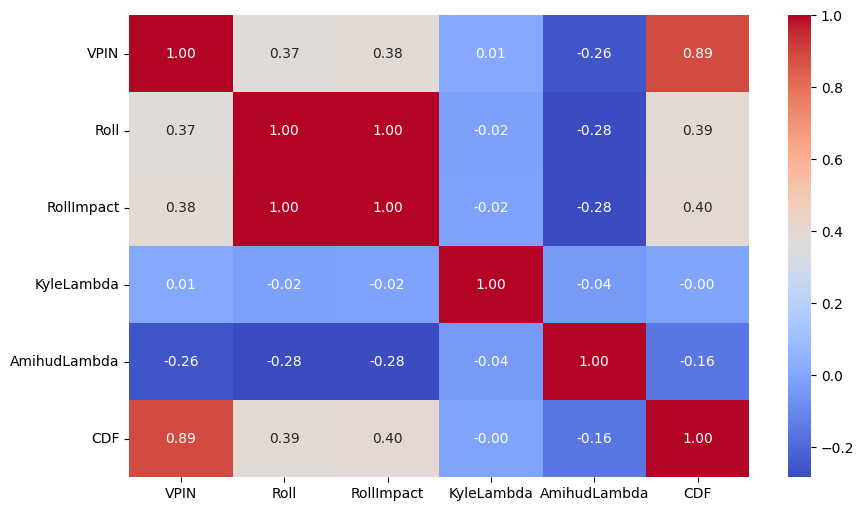

In [14]:
# heatmap:
plt.figure(figsize=(10, 6))
sns.heatmap(df[lst_input].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

<Figure size 1000x600 with 0 Axes>

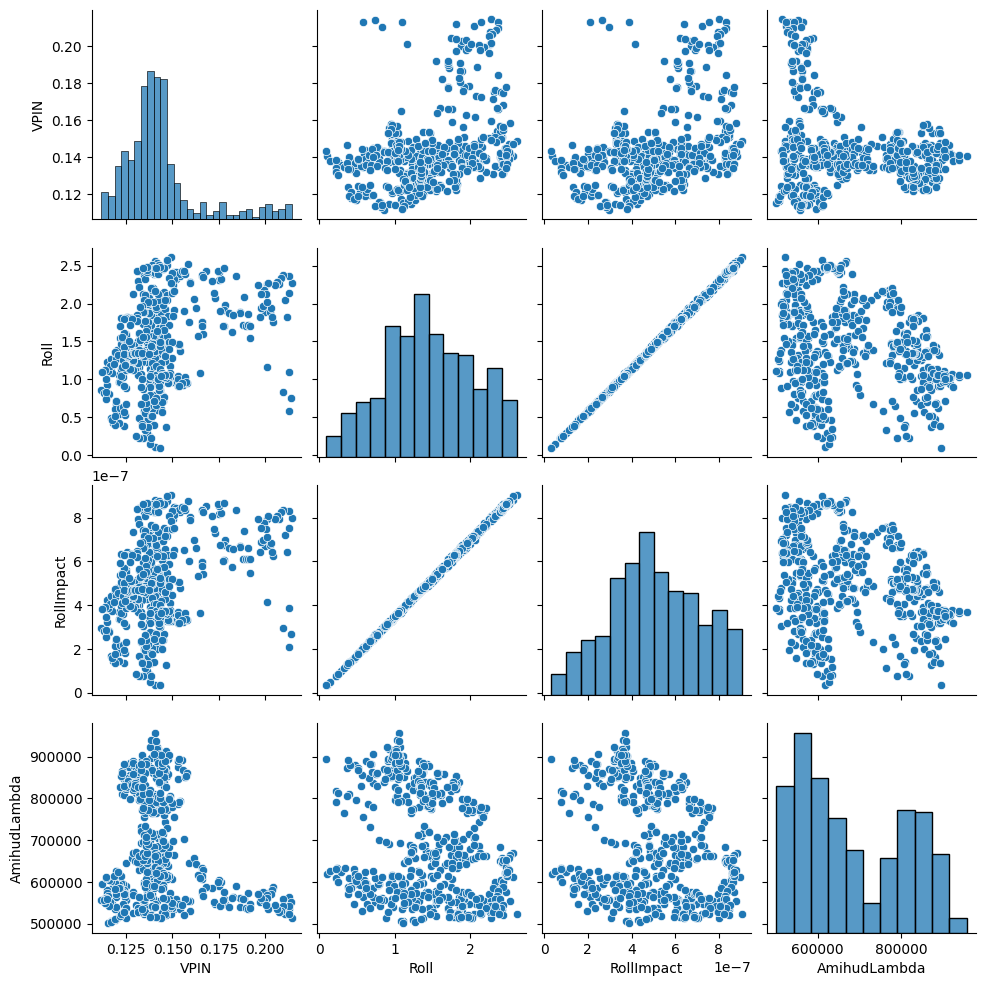

In [15]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.pairplot(df[['VPIN', 'Roll', 'RollImpact', 'AmihudLambda']])
plt.show()

# Phân tích mối quan hệ giữa VPIN và các biến mục tiêu

In [16]:
# List các biến mục tiêu
target_cols = list_output

In [17]:
# Loại bỏ các dữ liệu Nan do việc tính toán các chỉ số thống kê cuộn
df = df.dropna(subset=target_cols + ['VPIN'])

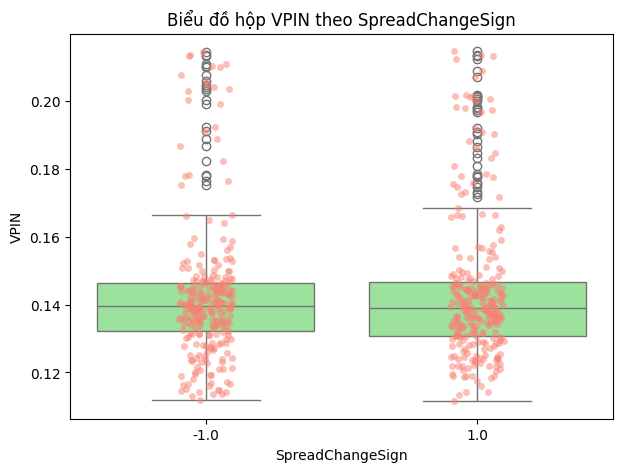

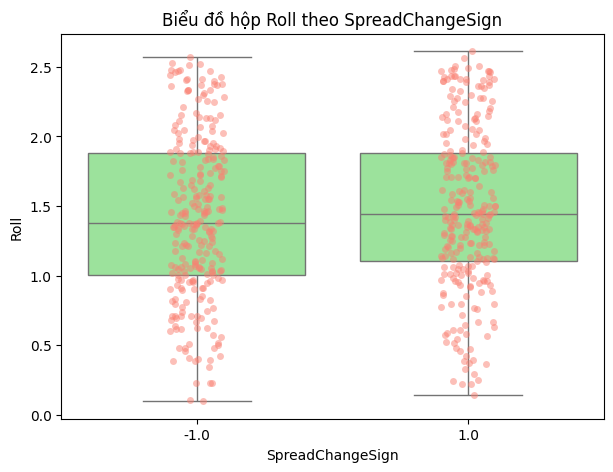

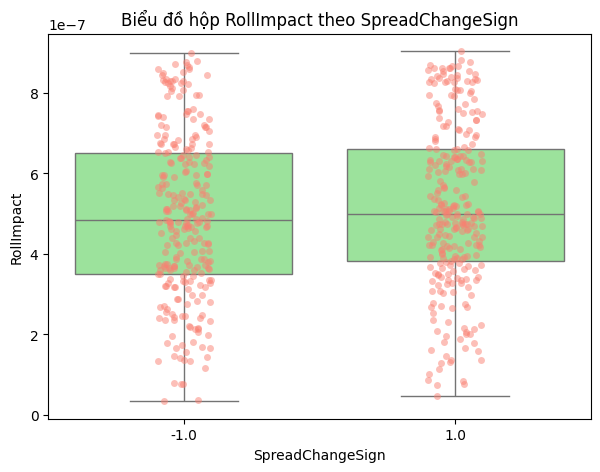

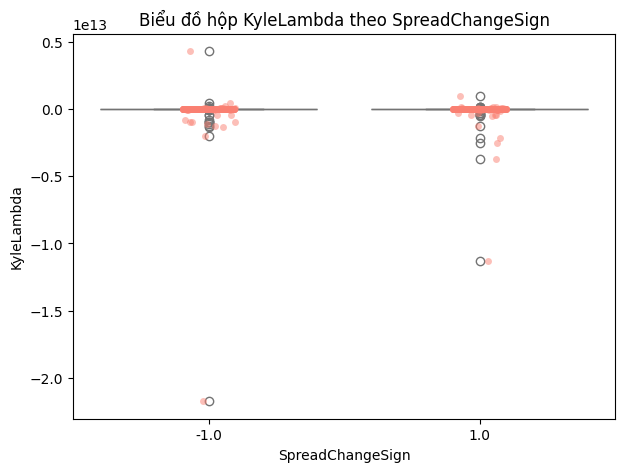

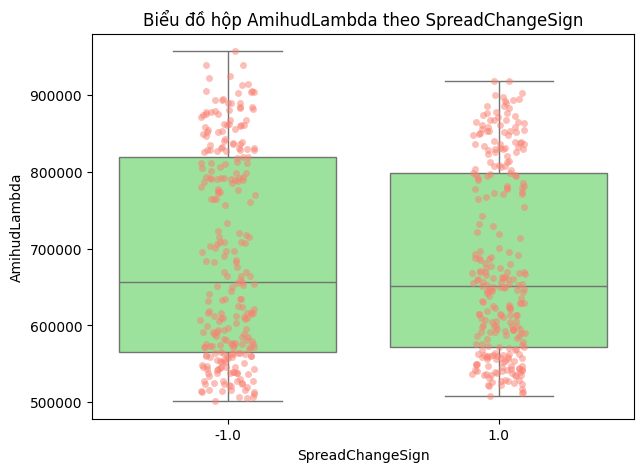

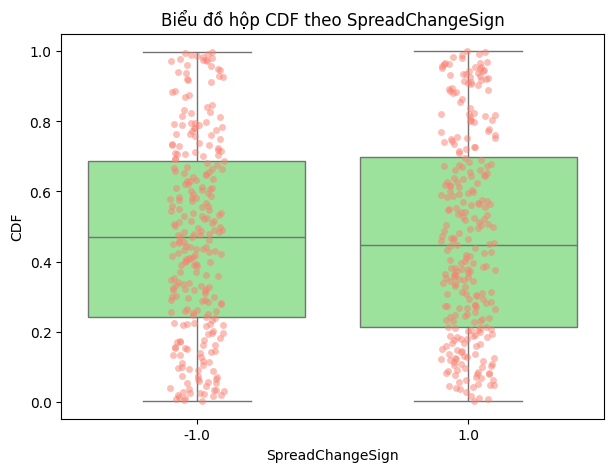

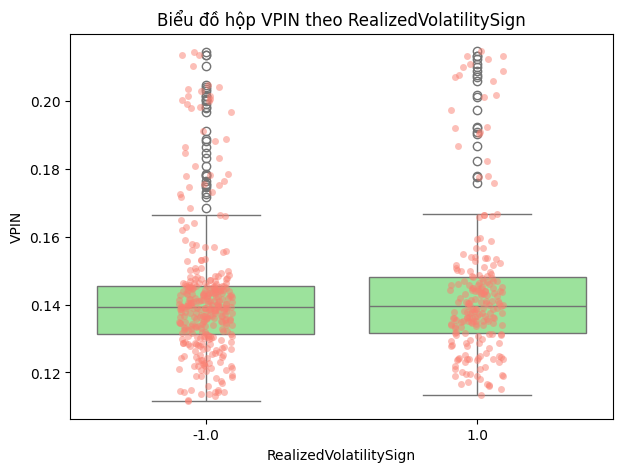

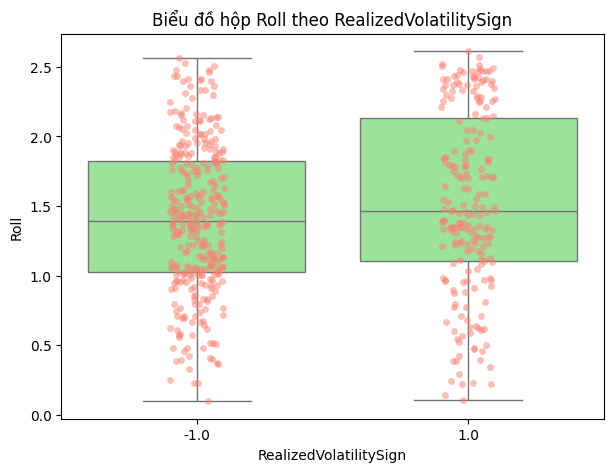

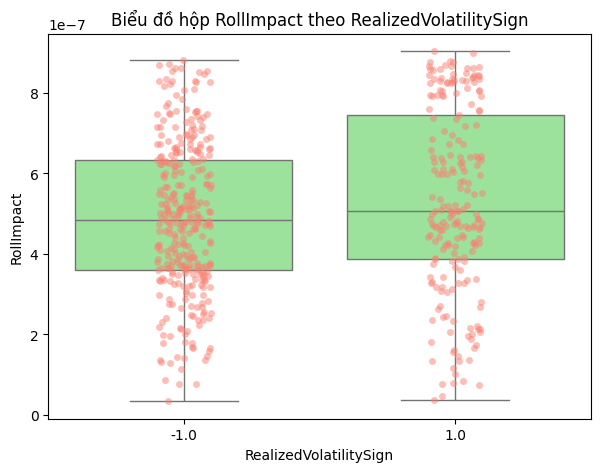

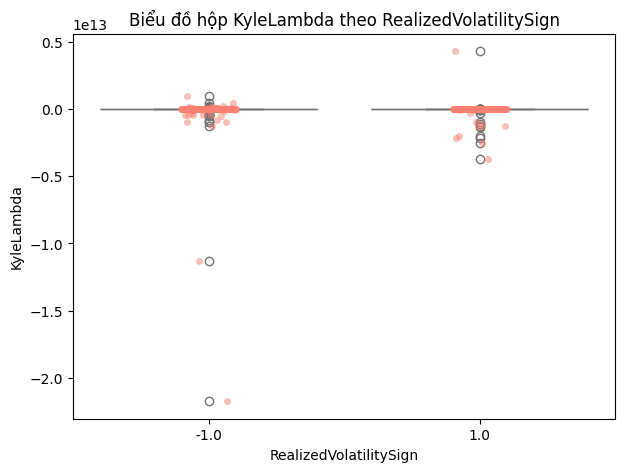

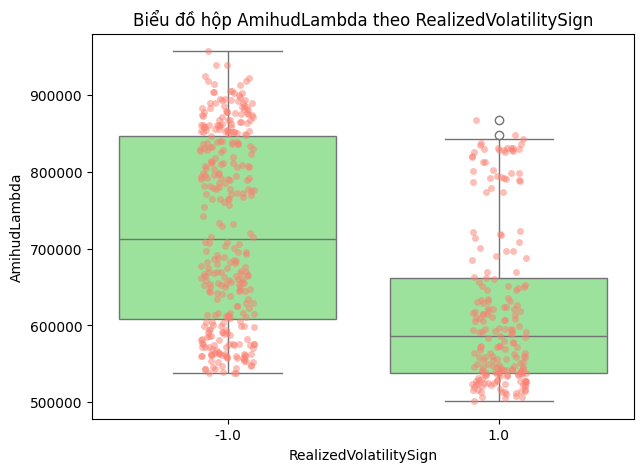

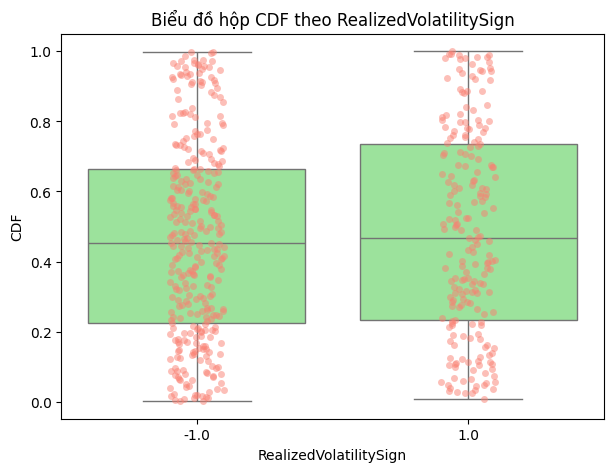

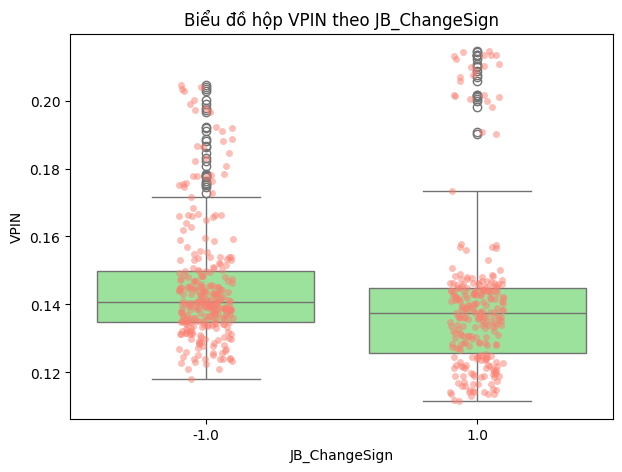

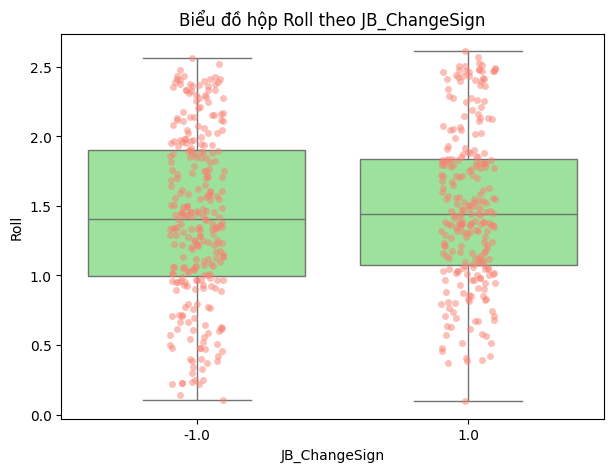

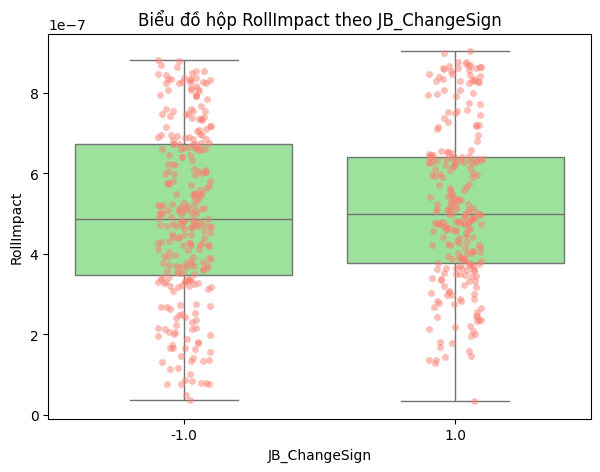

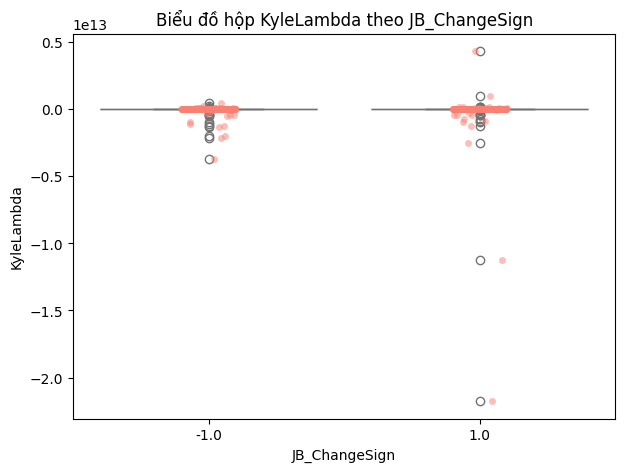

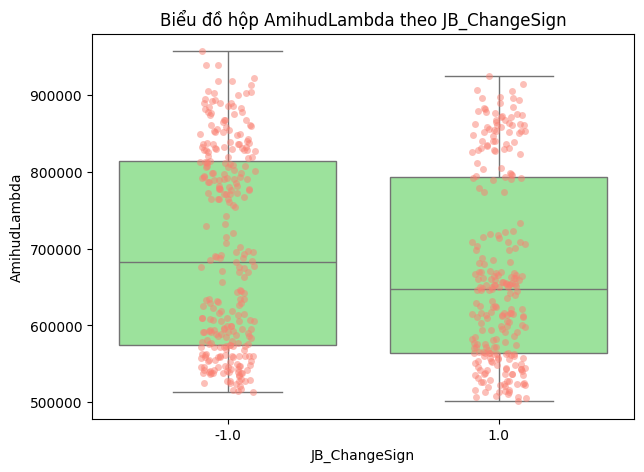

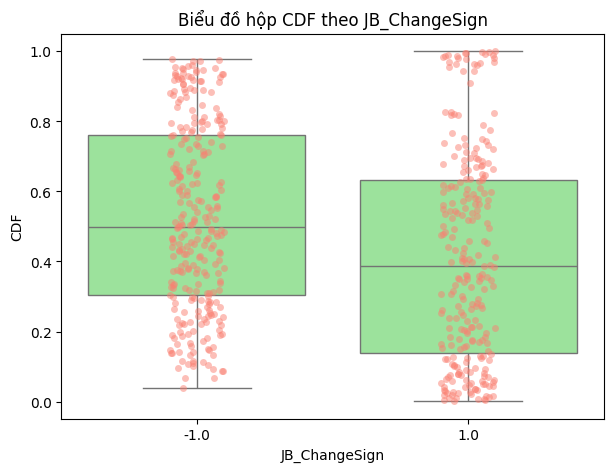

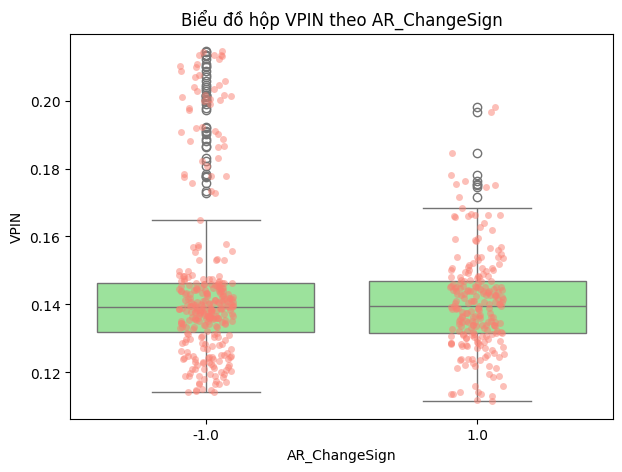

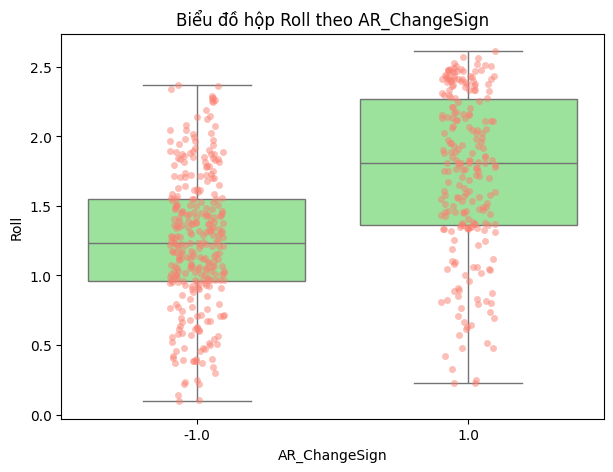

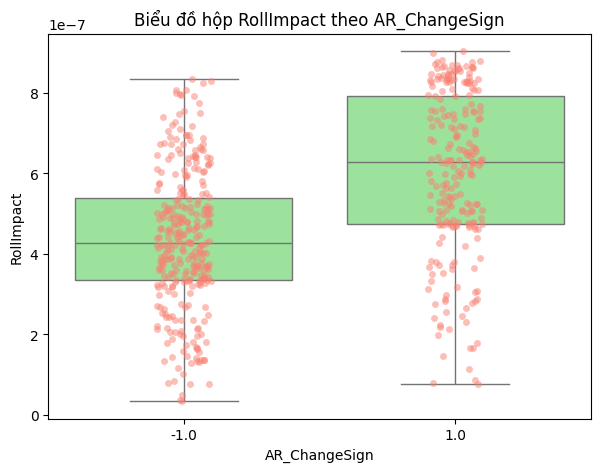

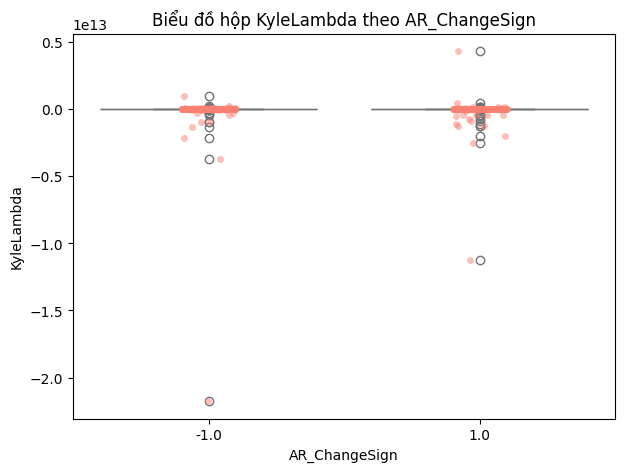

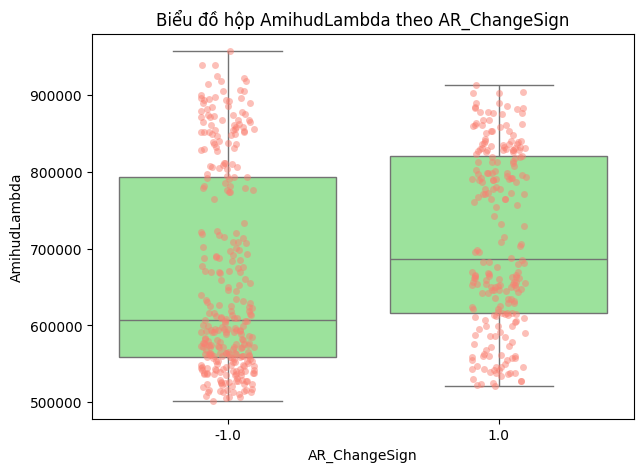

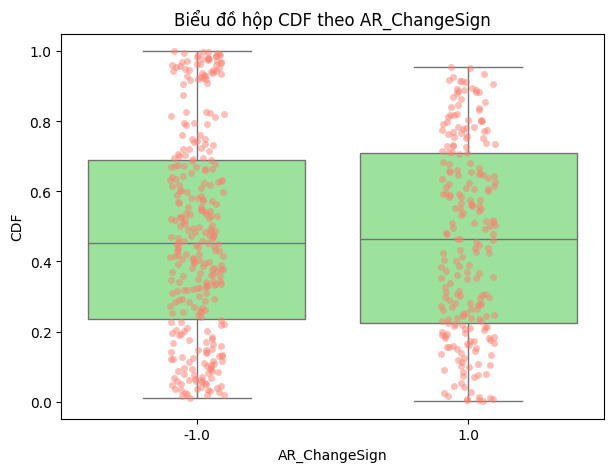

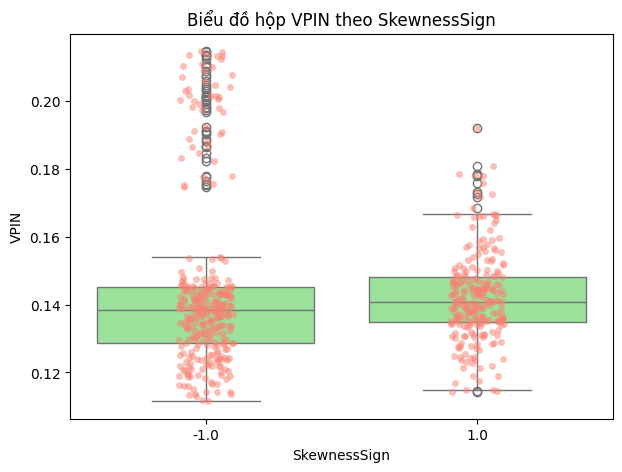

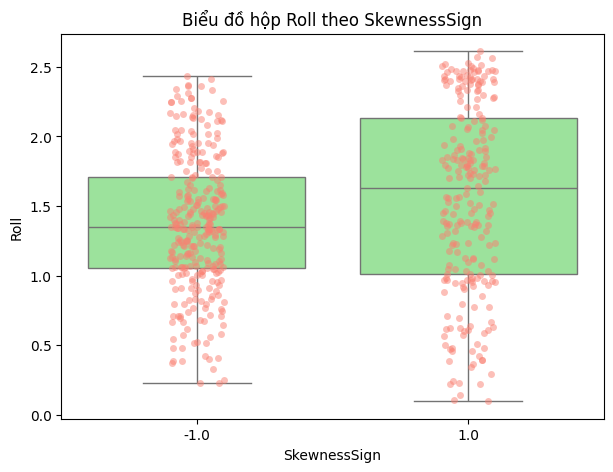

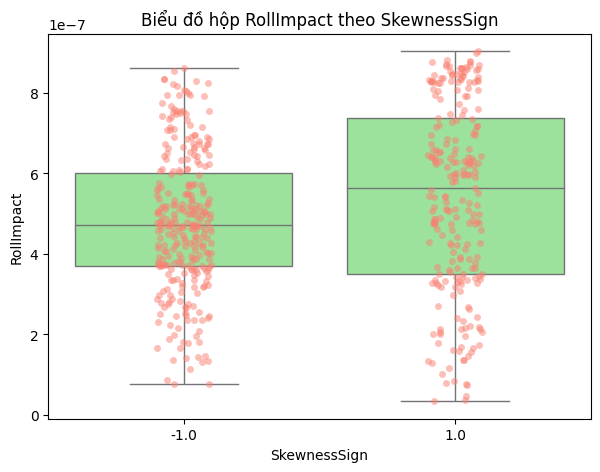

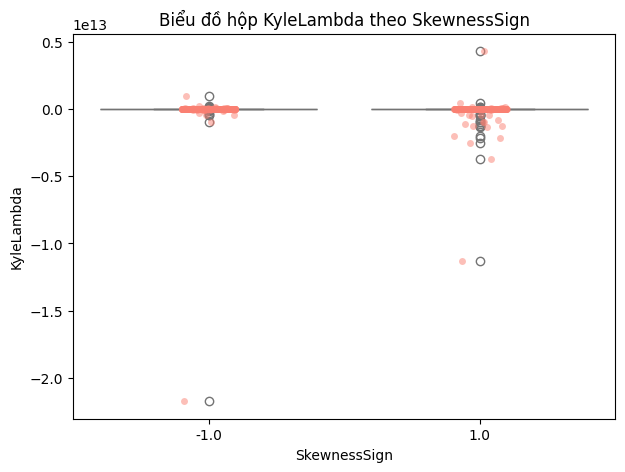

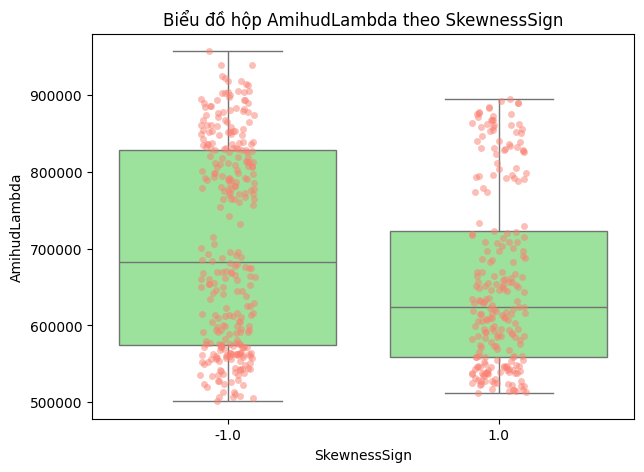

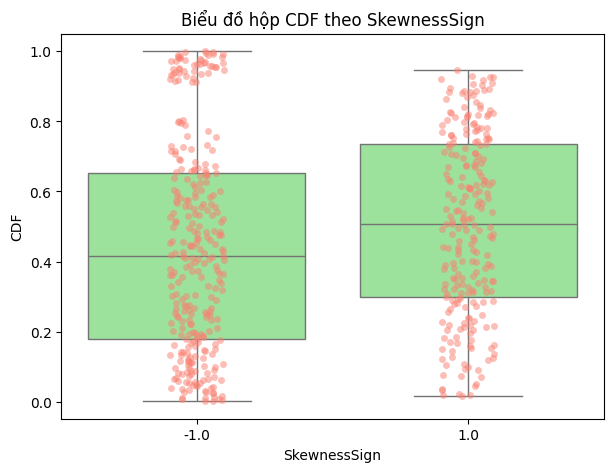

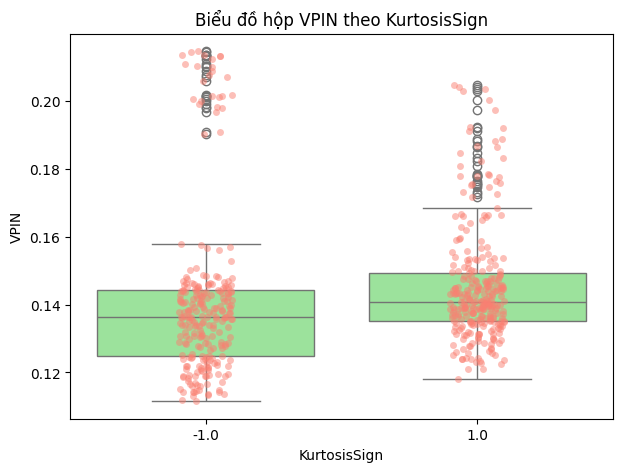

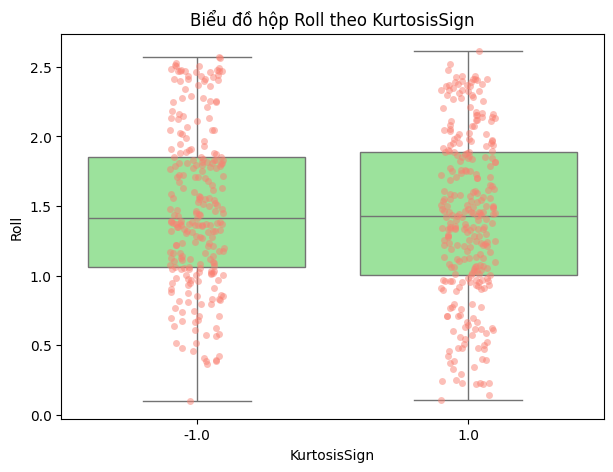

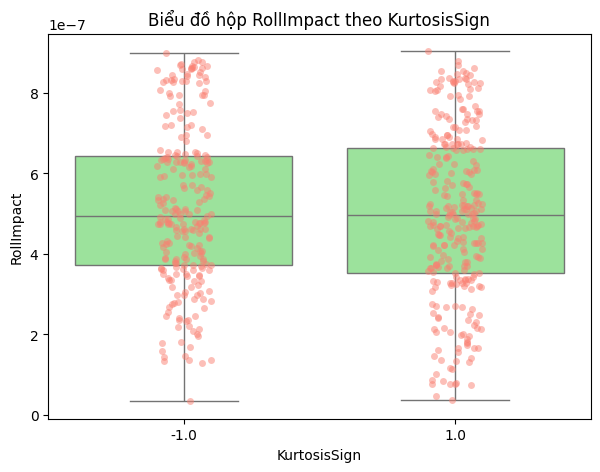

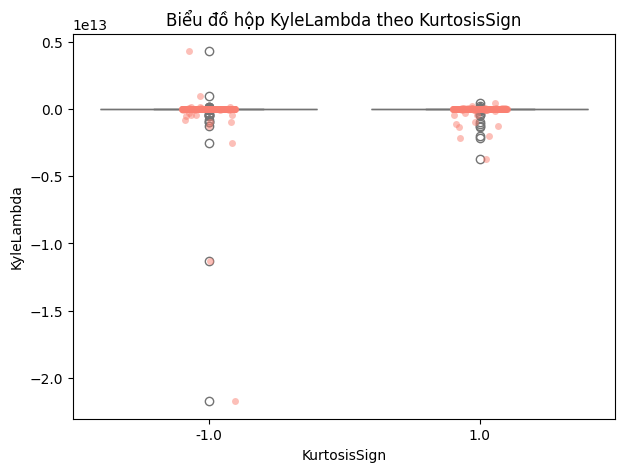

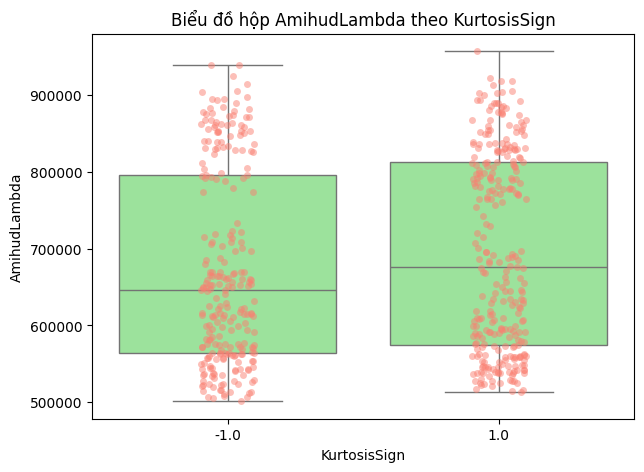

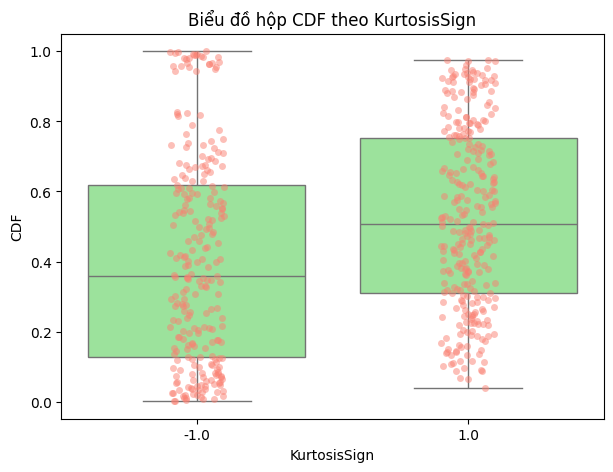

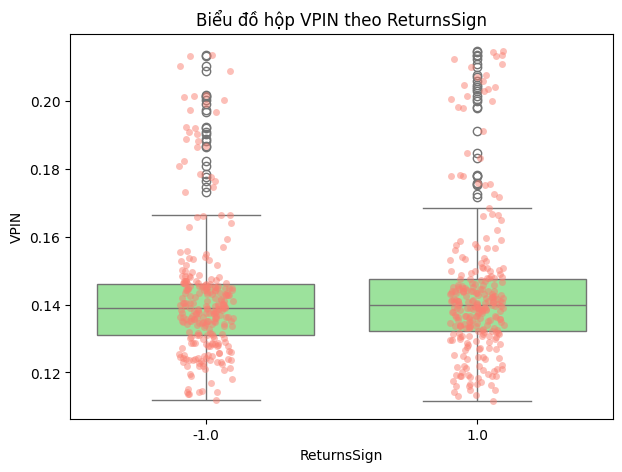

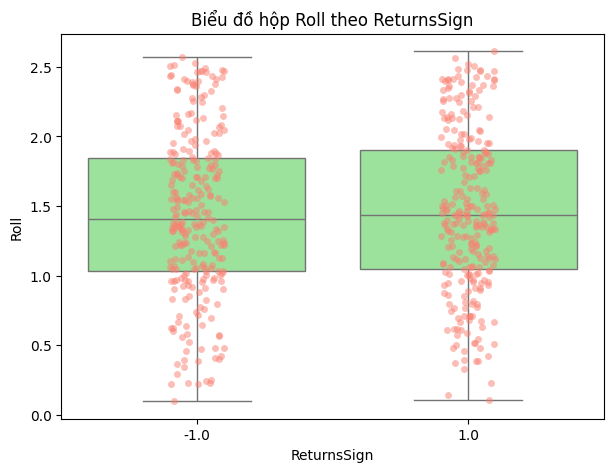

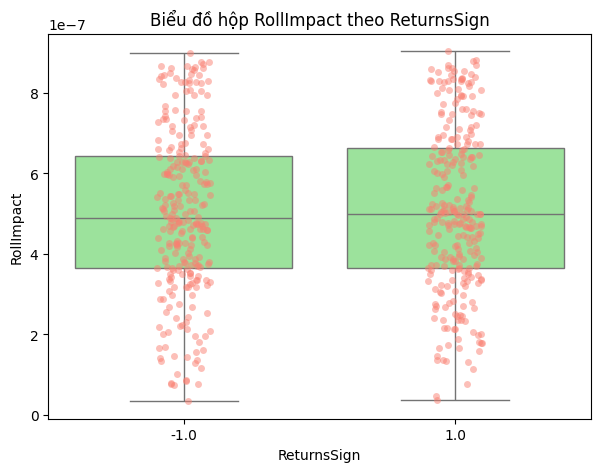

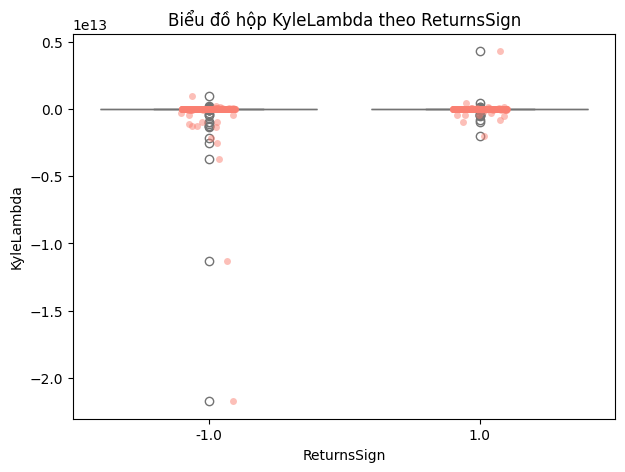

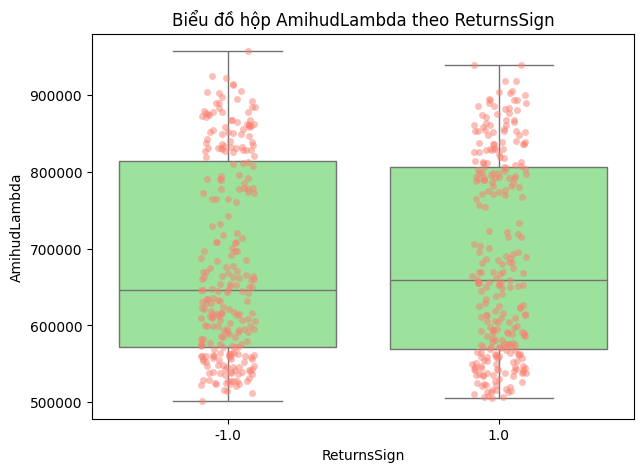

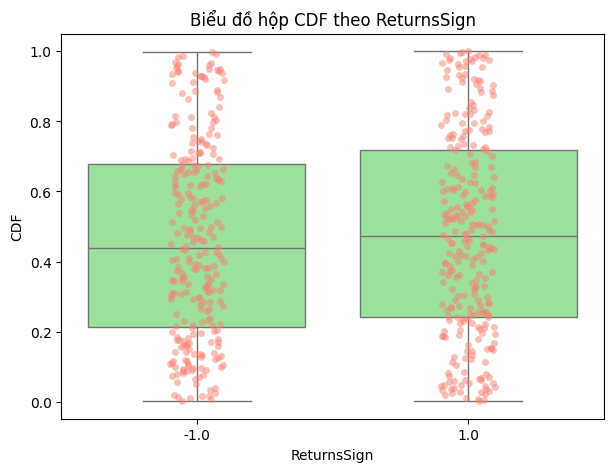

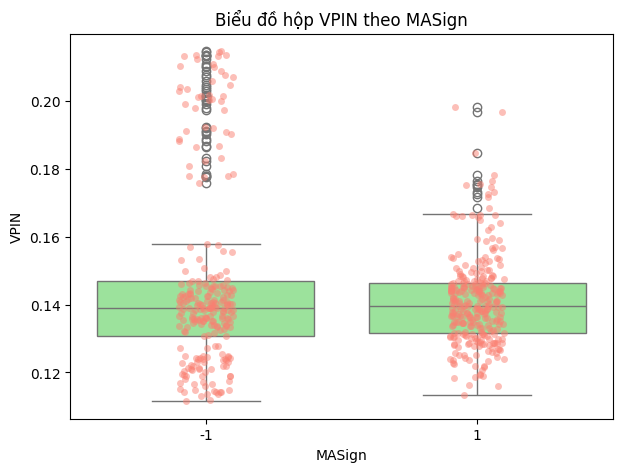

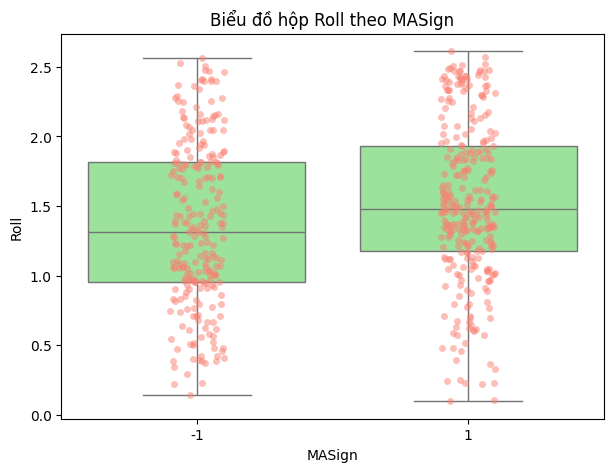

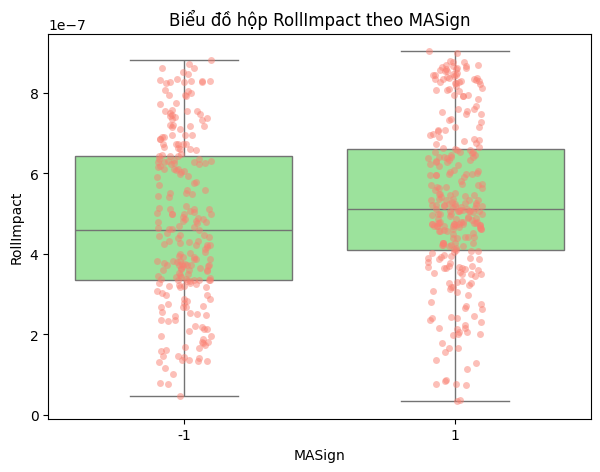

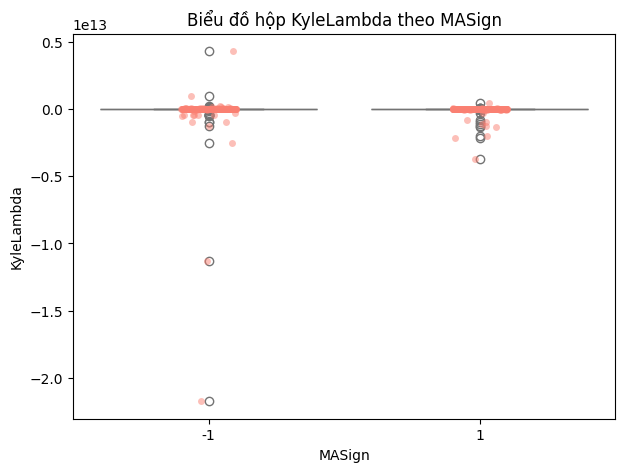

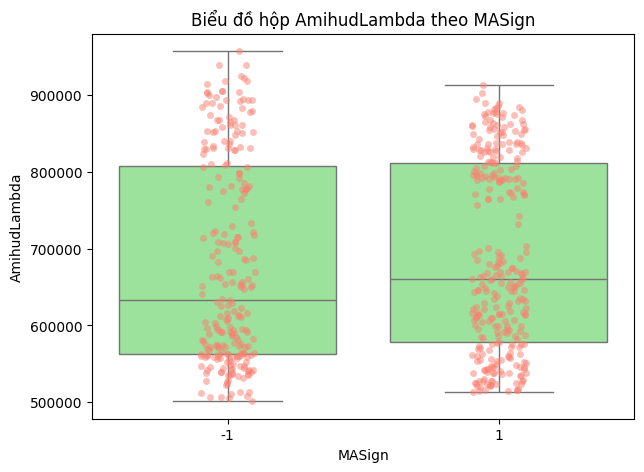

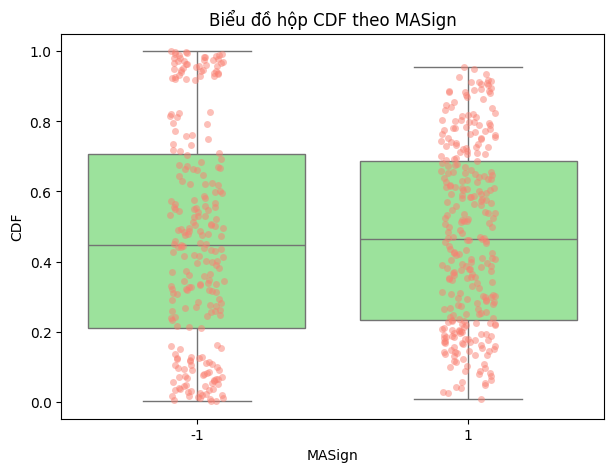

In [18]:
for col in target_cols:
    for col_in in lst_input:
        plt.figure(figsize=(7, 5))
        sns.boxplot(x=col, y=col_in, data=df, color='lightgreen')
        sns.stripplot(x=col, y=col_in, data=df, color='salmon', alpha=0.5, jitter=True)
        plt.title(f'Biểu đồ hộp {col_in} theo {col}')
        plt.show()

In [19]:
# for col in target_cols:
#     plt.figure(figsize=(6, 2))
#     sns.barplot(x=col, y='VPIN', data=df, color='lightgreen', errorbar=('ci', 95))
#     plt.title(f'Trung bình VPIN theo {col}')
#     plt.show()

# Kiểm định

### Kiểm tra phân phối của dữ liệu của các biến đầu vào

- Giả thuyết H0: Dữ liệu từng biến đầu vào tuân theo phân phối chuẩn
- Giả thuyết H1: Dữ liệu từng biến đầu không tuân theo phân phối chuẩn.

In [20]:
pvalue_normal_df = pd.DataFrame(index=lst_input, columns=["pvalue"])
for col in lst_input:
    stat, p = shapiro(df[col].dropna())
    # print(f'Shapiro-Wilk test: p-value = {p}')
    pvalue_normal_df.loc[col, "pvalue"] = p
pvalue_normal_df

,pvalue
VPIN,0.0
Roll,0.000005
RollImpact,0.000002
KyleLambda,0.0
AmihudLambda,0.0
CDF,0.0


Với mức ý nghĩa 5%:
- p rất bé => Bác bỏ giả thuyết H0. Chưa đủ bằng chứng để kết luận rằng dữ liệu của từng biến đầu vào có phân phối chuẩn

### Kiểm tra phân phối của các cột đầu vào theo từng nhóm

- Giả thuyết H0: Dữ liệu từng biến đầu vào cho từng nhóm có phân phối chuẩn
- Giả thuyế H1: Dữ liệu từng biến đầu cho từng nhóm không có phân phối chuẩn

In [21]:

pvalue_normal_1 = pd.DataFrame(index=target_cols, columns=lst_input)
pvalue_normal_minus1 = pd.DataFrame(index=target_cols, columns=lst_input)

for col in target_cols:
    for col_in in lst_input:
        # print(f"Kiểm định cho giá trị {col} - {col_in}")
        gr1 = df.loc[df[col] == 1, col_in]
        p1 = shapiro(gr1)[1]
        gr2 = df.loc[df[col] == -1, col_in]
        p2 = shapiro(gr1)[1]
        # print(f"pvalue với {col} = 1 cho {col_in}: ", p1)
        # print(f"pvalue với {col} = -1 cho {col_in}: ", p2)
        
        pvalue_normal_1.loc[col, col_in] = p1
        pvalue_normal_minus1.loc[col, col_in] = p2
pvalue_normal_1, pvalue_normal_minus1



(                            VPIN      Roll RollImpact KyleLambda AmihudLambda  \
 SpreadChangeSign             0.0   0.00064   0.000282        0.0          0.0   
 RealizedVolatilitySign       0.0  0.000012   0.000007        0.0          0.0   
 JB_ChangeSign                0.0  0.000729    0.00038        0.0          0.0   
 AR_ChangeSign           0.000001       0.0        0.0        0.0          0.0   
 SkewnessSign            0.000013  0.000001   0.000001        0.0          0.0   
 KurtosisSign                 0.0   0.00046   0.000413        0.0          0.0   
 ReturnsSign                  0.0  0.000754   0.000373        0.0          0.0   
 MASign                       0.0  0.000116   0.000062        0.0          0.0   
 
                              CDF  
 SpreadChangeSign             0.0  
 RealizedVolatilitySign  0.000002  
 JB_ChangeSign                0.0  
 AR_ChangeSign           0.000001  
 SkewnessSign            0.000005  
 KurtosisSign                 0.0  
 Returns

- Bác bỏ giả thuyết H0 rằng data cho từng nhóm có phân phối chuẩn

- Dữ liệu của các cột input và dữ liệu của chúng theo từng nhóm đều không có phân phối chuẩn, ta dùng kiểm định mannwhitneyu để kiểm định xem  giá trị input có khác biệt giữa các nhóm phân loại hay không

### Kiểm định Mannwhitney U
- Giả thuyết không (H₀): Phân phối của hai nhóm là giống nhau (không có sự khác biệt về vị trí trung tâm).

- Giả thuyết đối (H₁): Phân phối của hai nhóm là khác nhau (có sự khác biệt về vị trí trung tâm).

In [22]:
pvalue_df = pd.DataFrame(index=target_cols, columns=lst_input)
for col in target_cols:
    for col_in in lst_input:
        gr1 = df.loc[df[col] == 1, col_in]
        gr2 = df.loc[df[col] == -1, col_in]
        stat, p = mannwhitneyu(gr1, gr2)
        pvalue_df.loc[col, col_in] = p
pvalue_df

,VPIN,Roll,RollImpact,KyleLambda,AmihudLambda,CDF
SpreadChangeSign,0.969604,0.187656,0.188402,0.073482,0.682435,0.969604
RealizedVolatilitySign,0.456124,0.024377,0.020831,0.034641,0.0,0.456124
JB_ChangeSign,0.000005,0.220074,0.261083,0.071847,0.05746,0.000005
AR_ChangeSign,0.731082,0.0,0.0,0.000757,0.000003,0.731082
SkewnessSign,0.00675,0.000169,0.00024,0.032231,0.00011,0.00675
KurtosisSign,0.000001,0.333376,0.360237,0.073911,0.103361,0.000001
ReturnsSign,0.550747,0.684461,0.71163,0.981581,0.911629,0.550747
MASign,0.692709,0.000711,0.001769,0.573605,0.339648,0.692709


- VPIN: phân biệt rõ các biến liên quan JB_ChangeSign và KurtosisSign.
- Roll & RollImpact: dự đoán tốt RealizedVolatilitySign, AR_ChangeSign, SkewnessSign, MASign.
- KyleLambda & AmihudLambda: nhạy với RealizedVolatilitySign, AR_ChangeSign, SkewnessSign.
#### Kết luận:
- Roll, RollImpact, Kyle, Amihud là predictors mạnh cho nhiều biến Sign khác nhau.
- VPIN lại đặc biệt nhạy với các biến mô tả phân phối (JB, Kurtosis).
- ReturnsSign và SpreadChangeSign gần như không được phân biệt bởi các metric này.

## Áp dụng model: RandomForest

### Chuẩn bị bộ dữ liệu

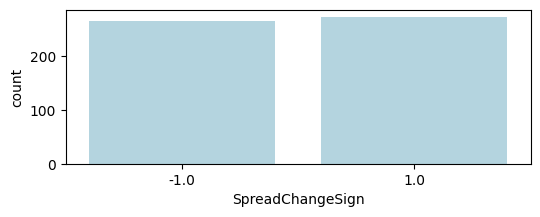

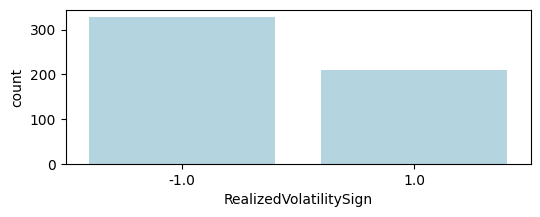

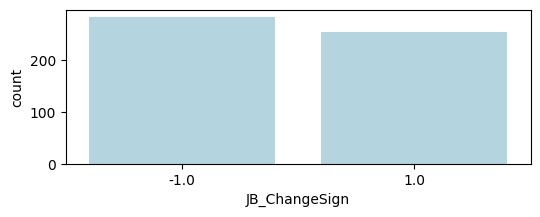

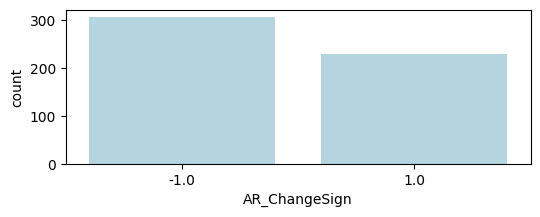

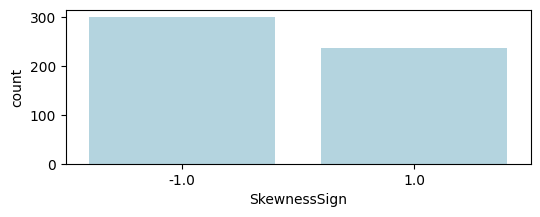

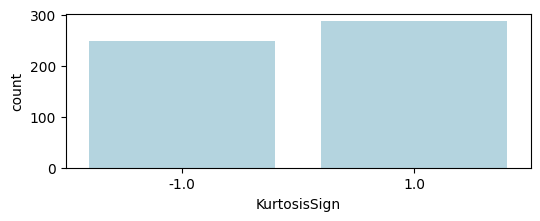

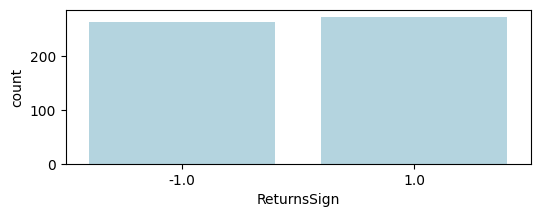

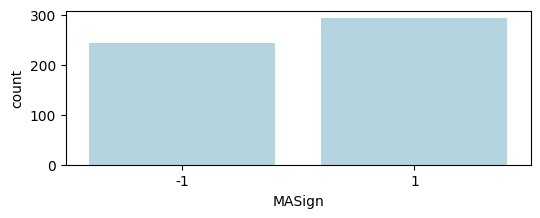

In [23]:
for col in target_cols:
    _ = pd.DataFrame(df[col].value_counts())
    plt.figure(figsize=(6, 2))
    sns.barplot(x=_.index, y=_["count"], color='lightblue', errorbar=('ci', 95))
    # plt.title(f'{col}')
    plt.show()

- Bộ dữ liệu có sự phân bố nhãn khá cân bằng giữa hai chiều giá trị (-1.0 và 1.0) ở các biến mục tiê. Mỗi biến đều có số lượng mẫu gần như tương đương giữa hai nhãn, với chênh lệch không đáng kể (dao động trong khoảng 2–14 mẫu). Điều này cho thấy bộ dữ liệu phù hợp để huấn luyện các mô hình học máy mà không cần xử lý mất cân bằng nhãn quá phức tạp.

In [24]:
train_data, test_data = {}, {}
for col in target_cols:
    data = df.copy()
    train_data[col], test_data[col] = train_test_split(data, test_size=0.3, random_state=42, stratify=data[col])
    

## Chỉ dùng VPIN làm biến đầu vào

In [25]:
train_cols = ["VPIN"]
acc_df = pd.DataFrame(index=target_cols, columns=["Accuracy"])
model_info = {}
for col in list_output:
    X_train = train_data[col][train_cols]
    y_train = train_data[col][col]
    X_test = test_data[col][train_cols]
    y_test = test_data[col][col]

    model_info[col] = RandomForestClassifier(n_estimators=1000, random_state=42)

    model_info[col].fit(X_train, y_train)

    y_pred = model_info[col].predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    print(f"Độ chính xác của mô hình cho {col}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    acc_df.loc[col, "Accuracy"] = f"{accuracy:.4f}"
acc_df

Độ chính xác của mô hình cho SpreadChangeSign: 0.5062
              precision    recall  f1-score   support

        -1.0       0.50      0.56      0.53        80
         1.0       0.51      0.45      0.48        82

    accuracy                           0.51       162
   macro avg       0.51      0.51      0.50       162
weighted avg       0.51      0.51      0.50       162

Độ chính xác của mô hình cho RealizedVolatilitySign: 0.5556
              precision    recall  f1-score   support

        -1.0       0.64      0.62      0.63        99
         1.0       0.43      0.46      0.45        63

    accuracy                           0.56       162
   macro avg       0.54      0.54      0.54       162
weighted avg       0.56      0.56      0.56       162

Độ chính xác của mô hình cho JB_ChangeSign: 0.6852
              precision    recall  f1-score   support

        -1.0       0.68      0.76      0.72        85
         1.0       0.70      0.60      0.64        77

    accuracy     

,Accuracy
SpreadChangeSign,0.5062
RealizedVolatilitySign,0.5556
JB_ChangeSign,0.6852
AR_ChangeSign,0.5926
SkewnessSign,0.5802
KurtosisSign,0.6420
ReturnsSign,0.4753
MASign,0.5926


## Dùng tất cả các biến input

In [26]:
train_cols = lst_input
acc_df = pd.DataFrame(index=target_cols, columns=["Accuracy"])
model_info = {}
for col in list_output:
    X_train = train_data[col][train_cols]
    y_train = train_data[col][col]
    X_test = test_data[col][train_cols]
    y_test = test_data[col][col]

    model_info[col] = RandomForestClassifier(n_estimators=1000, random_state=42)

    model_info[col].fit(X_train, y_train)

    y_pred = model_info[col].predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    print(f"Độ chính xác của mô hình cho {col}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    acc_df.loc[col, "Accuracy"] = f"{accuracy:.4f}"
print("Accuracy df:")
acc_df

Độ chính xác của mô hình cho SpreadChangeSign: 0.4753
              precision    recall  f1-score   support

        -1.0       0.47      0.51      0.49        80
         1.0       0.48      0.44      0.46        82

    accuracy                           0.48       162
   macro avg       0.48      0.48      0.47       162
weighted avg       0.48      0.48      0.47       162

Độ chính xác của mô hình cho RealizedVolatilitySign: 0.8457
              precision    recall  f1-score   support

        -1.0       0.85      0.91      0.88        99
         1.0       0.84      0.75      0.79        63

    accuracy                           0.85       162
   macro avg       0.84      0.83      0.83       162
weighted avg       0.85      0.85      0.84       162

Độ chính xác của mô hình cho JB_ChangeSign: 0.8951
              precision    recall  f1-score   support

        -1.0       0.89      0.92      0.90        85
         1.0       0.91      0.87      0.89        77

    accuracy     

,Accuracy
SpreadChangeSign,0.4753
RealizedVolatilitySign,0.8457
JB_ChangeSign,0.8951
AR_ChangeSign,0.9012
SkewnessSign,0.8704
KurtosisSign,0.8272
ReturnsSign,0.4815
MASign,0.8457


In [27]:

acc_df = pd.DataFrame(index=target_cols, columns=train_cols)
model_info = {}
for col in list_output:
    for col_in in lst_input:
        train_cols = [col_in]
        X_train = train_data[col][train_cols]
        y_train = train_data[col][col]
        X_test = test_data[col][train_cols]
        y_test = test_data[col][col]

        model_info[col] = RandomForestClassifier(n_estimators=1000, random_state=42)

        model_info[col].fit(X_train, y_train)

        y_pred = model_info[col].predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        print(f"Độ chính xác của mô hình cho {col}: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))
        acc_df.loc[col, col_in] = f"{accuracy:.4f}"
acc_df

Độ chính xác của mô hình cho SpreadChangeSign: 0.5062
              precision    recall  f1-score   support

        -1.0       0.50      0.56      0.53        80
         1.0       0.51      0.45      0.48        82

    accuracy                           0.51       162
   macro avg       0.51      0.51      0.50       162
weighted avg       0.51      0.51      0.50       162

Độ chính xác của mô hình cho SpreadChangeSign: 0.5062
              precision    recall  f1-score   support

        -1.0       0.50      0.53      0.51        80
         1.0       0.51      0.49      0.50        82

    accuracy                           0.51       162
   macro avg       0.51      0.51      0.51       162
weighted avg       0.51      0.51      0.51       162

Độ chính xác của mô hình cho SpreadChangeSign: 0.5123
              precision    recall  f1-score   support

        -1.0       0.51      0.57      0.54        80
         1.0       0.52      0.45      0.48        82

    accuracy        

,VPIN,Roll,RollImpact,KyleLambda,AmihudLambda,CDF
SpreadChangeSign,0.5062,0.5062,0.5123,0.4815,0.4815,0.4753
RealizedVolatilitySign,0.5556,0.5370,0.5062,0.6049,0.7222,0.5185
JB_ChangeSign,0.6852,0.4506,0.5802,0.5617,0.5556,0.6543
AR_ChangeSign,0.5926,0.6235,0.5988,0.5864,0.5247,0.5864
SkewnessSign,0.5802,0.6296,0.6049,0.6173,0.5802,0.5494
KurtosisSign,0.6420,0.5123,0.4691,0.5617,0.5679,0.5988
ReturnsSign,0.4753,0.3642,0.4877,0.5309,0.4630,0.5000
MASign,0.5926,0.5556,0.5370,0.5926,0.5062,0.5864


### Mô hình XGBoost

In [28]:
# train_cols = ["VPIN"]
# for col in target_cols:
#         # Khởi tạo mô hình XGBoost
#     model = XGBClassifier(
#         n_estimators=100,
#         max_depth=3,
#         learning_rate=0.1,
#         # use_label_encoder=False,
#         eval_metric='logloss'
#     )
#     X_train = train_data[col][train_cols]
#     y_train = train_data[col][col].map({-1.0: 0, 1.0: 1})
#     X_test = test_data[col][train_cols]
#     y_test = test_data[col][col].map({-1.0: 0, 1.0: 1})

#     # Huấn luyện mô hình
#     model.fit(X_train, y_train)

#     # Dự đoán và đánh giá
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     report = classification_report(y_test, y_pred)

#     print(f"Độ chính xác của mô hình cho {col}: {accuracy:.4f}")
#     print(report)


In [29]:
# train_cols = lst_input
# for col in target_cols:
#         # Khởi tạo mô hình XGBoost
#     model = XGBClassifier(
#         n_estimators=100,
#         max_depth=3,
#         learning_rate=0.1,
#         # use_label_encoder=False,
#         eval_metric='logloss'
#     )
#     X_train = train_data[col][train_cols]
#     y_train = train_data[col][col].map({-1.0: 0, 1.0: 1})
#     X_test = test_data[col][train_cols]
#     y_test = test_data[col][col].map({-1.0: 0, 1.0: 1})

#     # Huấn luyện mô hình
#     model.fit(X_train, y_train)

#     # Dự đoán và đánh giá
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     report = classification_report(y_test, y_pred)

#     print(f"Độ chính xác của mô hình: {accuracy:.4f}")
#     print(report)
